# Project 3: Sharing Dataset on Kaggle

## Introduction:
> ### About Bayt.com
>Bayt.com is the leading job site in the Middle East and North Africa, connecting job seekers with employers looking to hire. Every day, thousands of new job vacancies are listed on the award-winning platform from the region's top employers.

#### https://www.kaggle.com/haninalmarshad/bayt-com-webscraping

#### https://www.kaggle.com/dataset/84b8879e36c9dd9b7276837a7bc035170fd6438689816cd0a2967fbf6cf8b498



## Part 3 EDA

### Import

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
colors = ['powderblue', 'wheat', 'lightpink', 'lightcoral', 'rosybrown', 'darkseagreen',
          'beige',  'lightsalmon', 'palevioletred','peachpuff','powderblue', 'wheat', 'lightpink', 'lightcoral']
# Set custom color palette
c_palette = sns.set_palette(sns.color_palette(colors))

### Reading File

In [3]:
data = pd.read_csv('../data/jobs_bayt_c2.csv')

### Explore data 

In [4]:
#data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 26 columns):
Job ID                      3468 non-null int64
Title                       3468 non-null object
Job URL                     3468 non-null object
Company                     3468 non-null object
Company_URL                 3468 non-null object
Date Posted                 3468 non-null object
Job Description             3468 non-null object
Job Location                3467 non-null object
Company Industry            3468 non-null object
Company Type                3468 non-null object
Job Role                    3468 non-null object
Employment Type             3468 non-null object
Number of Vacancies         3468 non-null object
Career Level                986 non-null object
Residence Location          556 non-null object
Degree                      693 non-null object
Tags                        3468 non-null object
Gender                      338 non-null object
Job Country     

### Job Role 

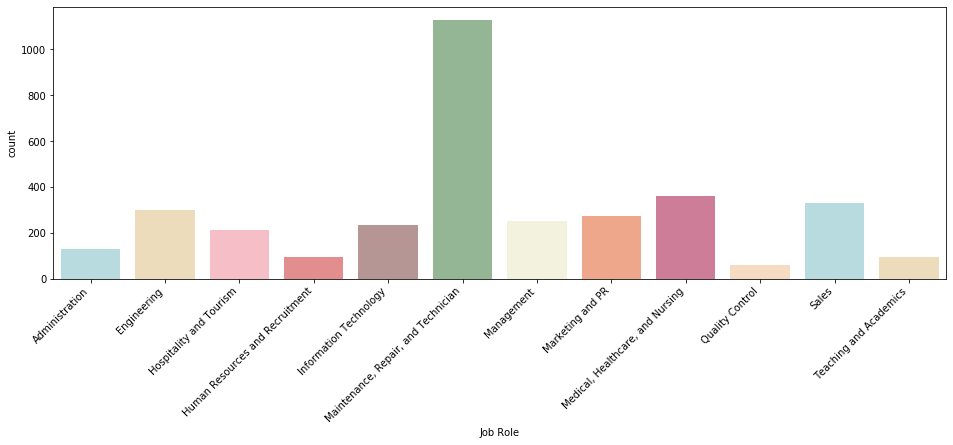

In [6]:
plt.figure(figsize=(16, 5))
chart =  sns.countplot(x='Job Role', data=data, palette=c_palette)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

### Company Type

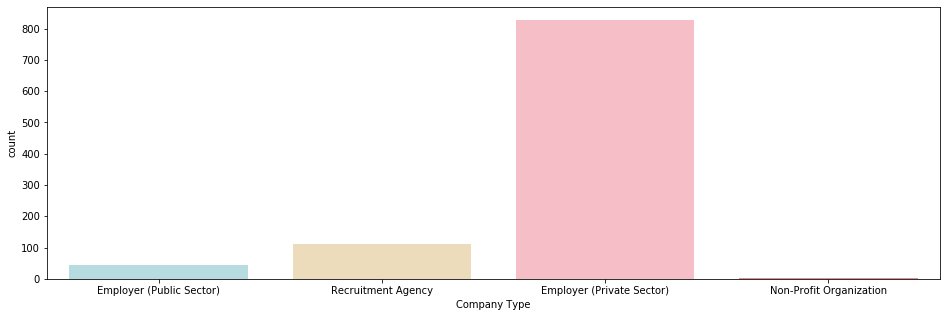

In [7]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Company Type', data=data.loc[data['Company Type']!='Unspecified'], palette=c_palette);

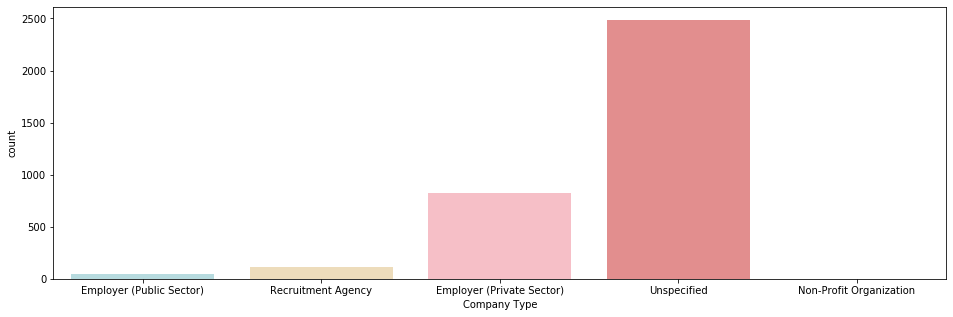

In [8]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Company Type', data=data, palette=c_palette);

### Employment Type

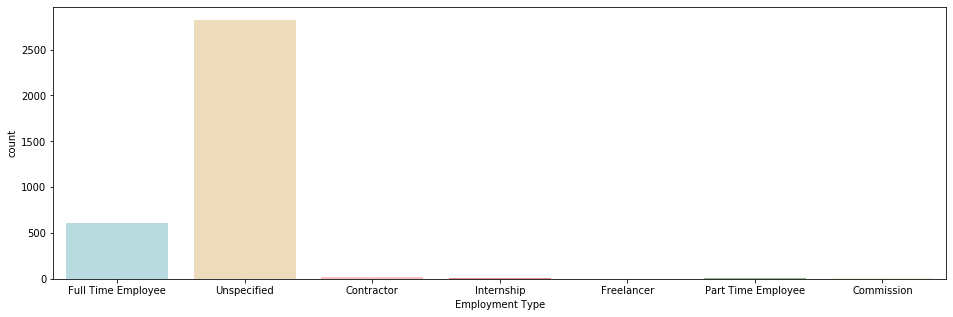

In [9]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Employment Type', data=data,  palette=c_palette);

### Career Level

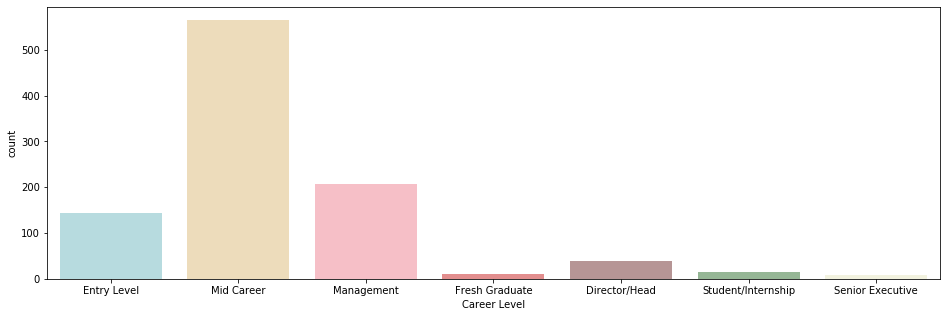

In [10]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Career Level', data=data,  palette=c_palette);

### Job City

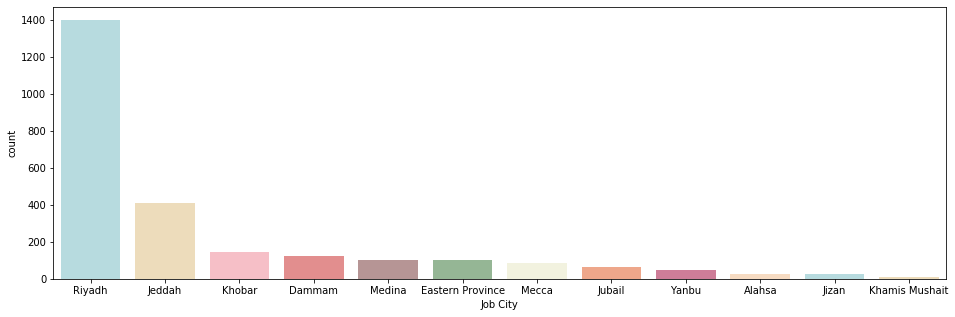

In [11]:
plt.figure(figsize=(16, 5))
chart = sns.countplot(x='Job City', data=data,  palette=c_palette ,
                     order=pd.value_counts(data['Job City']).iloc[:12].index);

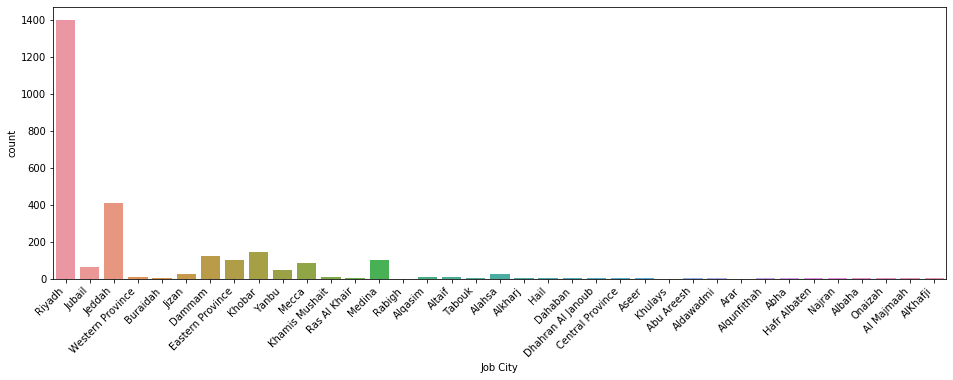

In [12]:
plt.figure(figsize=(16, 5))
chart = sns.countplot(x='Job City', data=data,  palette=c_palette)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

### Date Posted

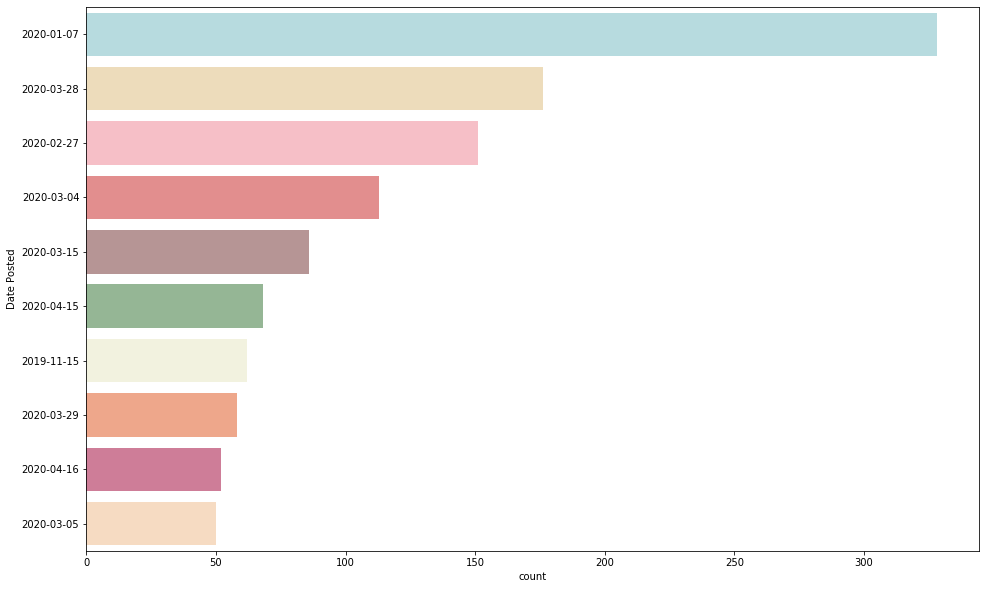

In [13]:
groupby_Dates = data.groupby('Date Posted').count()

plt.figure(figsize=(16, 10))
Date_chart = sns.countplot(y='Date Posted', data=data,  palette=c_palette ,
                     order=pd.value_counts(data['Date Posted']).iloc[:10].index);

### correlation between numerical columns

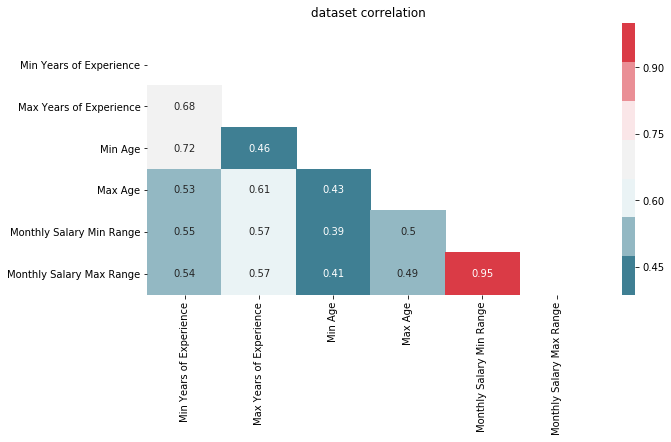

In [14]:

corrs = data.drop(labels ='Job ID',axis=1).corr()
plt.figure(figsize=(10, 5))
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns_palette = sns.color_palette(sns.diverging_palette( 220,10 ,sep=80, n=7)).as_hex()
ax = sns.heatmap(corrs, mask=mask, annot=True, cmap =ListedColormap(sns_palette))
ax.set_title('dataset correlation ')
# fix for mpl bug that cuts off top/bottom of seaborn viz
ax.set_ylim(len(corrs), -0.5)
plt.show()